FIAP - Tecnólogo de Inteligência Artificial


# Machine Learning & Modelling - Checkpoint #2 e Checkpoint #3 

Faça _individualmente_ a lista abaixo para praticar análise descritiva, gráficos e regressão linear. Utilize os conceitos vistos em sala, os notebooks disponíveis e consulte documentações de Python na Internet. Em caso de dúvidas, contate o Prof. Michel. 

**Entrega**: 26/maio/2022, via Teams - IMPORTANTE: renomeie o notebook incluindo seu nome! 



## Dataset

O dataset mapeia características de pessoas cruzando com o valor pago pelo seu seguro de saúde nos EUA. Os dados são compostos pelas seguintes variáveis: 

- `age` : idade do indivíduo 
- `sex` : sexo do indivíduo 
- `bmi` : "Body mass index", o IMC (índice de massa corporal)
- `children` : número de filhos
- `smoker` : fumante ou não?
- `region` : região de residência da pessoa
- `charges` : tarifa paga pela pessoa

Os dados podem ser lidos diretamente a partir desta URL: https://tinyurl.com/42rvaw4p


## Atividades 

A partir da leitura do dataset, realize as seguintes tarefas: 

### Gerais (CK #2)

1. Faça uma análise descritiva geral dos dados, para se familirizar com o dataset 

### Gráficos (CK #2)

Lembrem-se! Todo gráfico precisa ter um título, o nome do Eixo X e do Eixo Y! Estas alterações nos gráficos são **obrigatórias**. Outras alterações de layout são bem-vindas, e podem gerar nota extra ;D

2. Faça um histograma com as idades das pessoas
3. Faça uma gráfico com a distribuição das pessoas por sexo
4. Faça um boxplot de gastos por região. Cada região deve estar em um boxplot distinto 
5. Faça um gráfico de dispersão (scatter plot) de BMI (eixo X) e Charges (eixo Y). Defina a cor dos pontos pela variável "sex"
6. Faça um pairplot (da biblioteca seaborn) de todas as variáveis. Defina a cor (parâmetro _hue_ ) em função da variável smoker. Observando especialmente os gráficos da linha ou coluna das tarifas (charges), quais são suas principais conclusões? 


### Filtros de dataframes (CK #3)

7. Faça um dataframe menor selecionamento apenas selecionando as pessoas que pagam acima do valor médio da tarifa. Descreva o perfil destas pessoas em termos de suas variáveis: ou seja, possuem quantos filhos? qual a idade média? são geralmente os homens ou as mulheres? etc. 
8. Verifique quantas pessoas existem abaixo dos 30 anos E que são fumantes


### Regressão linear (CK #3)

9. Padronize as features do dataset 
10. Execute uma regressão linear simples usando todas as features (o label é o valor pago do seguro). Calcule o `R2 score` e interprete o valor desta métrica

Nome: Daniel Faria de Barros RM: 94026

In [ ]:
# Imports 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

# imports (graficos)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
!pip install seaborn
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Load do Dataset
ds = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")


# 1 - Analise Descritiva dos Dados

In [ ]:
# Print das 10 primeiras linhas do Dataset
ds.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
# Total de linhas e colunas (dados)
ds.shape

(1338, 7)

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# mostra os valores unicos de cada coluna
ds.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [ ]:
# Estatiscas do Dataset
ds.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
filtro = ds[(ds["sex"] == "female")]["bmi"]
filtro

0       27.90
5       25.74
6       33.44
7       27.74
9       25.84
        ...  
1332    44.70
1334    31.92
1335    36.85
1336    25.80
1337    29.07
Name: bmi, Length: 662, dtype: float64

In [ ]:
# Filtro de mulheres adultas acima do peso
filtroMulheres = ds[(ds["bmi"] > 25 ) & (ds["sex"] == "female") & (ds["age"] > 18)]
filtroMulheres

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1330,57,female,25.74,2,no,southeast,12629.16560
1331,23,female,33.40,0,no,southwest,10795.93733
1332,52,female,44.70,3,no,southwest,11411.68500
1336,21,female,25.80,0,no,southwest,2007.94500


In [ ]:
# Filtro Homens adultos acima do peso
filtroHomens = ds[(ds["bmi"] > 25 ) & (ds["sex"] == "male") & (ds["age"] > 18)]
filtroHomens

,age,sex,bmi,children,smoker,region,charges
2,28,male,33.000,3,no,southeast,4449.46200
4,32,male,28.880,0,no,northwest,3866.85520
8,37,male,29.830,2,no,northeast,6406.41070
10,25,male,26.220,0,no,northeast,2721.32080
12,23,male,34.400,0,no,southwest,1826.84300
...,...,...,...,...,...,...,...
1324,31,male,25.935,1,no,northwest,4239.89265
1325,61,male,33.535,0,no,northeast,13143.33665
1327,51,male,30.030,1,no,southeast,9377.90470
1329,52,male,38.600,2,no,southwest,10325.20600


In [ ]:
ds[ds["sex"] == "male"]

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
8,37,male,29.830,2,no,northeast,6406.41070
...,...,...,...,...,...,...,...
1324,31,male,25.935,1,no,northwest,4239.89265
1325,61,male,33.535,0,no,northeast,13143.33665
1327,51,male,30.030,1,no,southeast,9377.90470
1329,52,male,38.600,2,no,southwest,10325.20600


# 2 - Gráficos

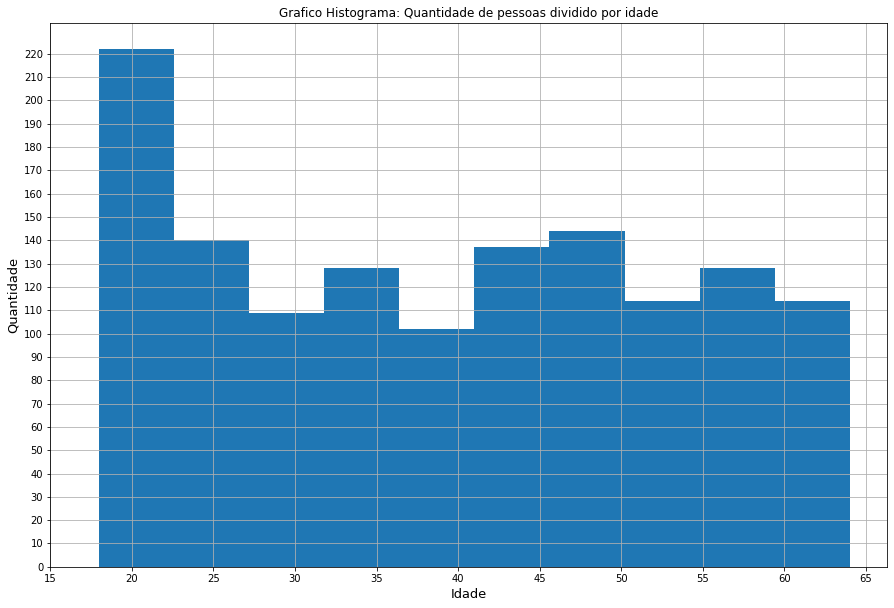

In [ ]:
# histograma com as idades das pessoas

import matplotlib.pyplot as plt

ds.hist(column= "age", bins = 10, figsize=(15,10))
plt.title("Grafico Histograma: Quantidade de pessoas dividido por idade")
plt.xticks(range(15,70,5))
plt.yticks(range(0,230,10))
plt.ylabel("Quantidade", fontsize=13)
plt.xlabel("Idade", fontsize=13)
plt.show;

In [ ]:
# pegando a quantidade de pessoas por sexo
ds.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

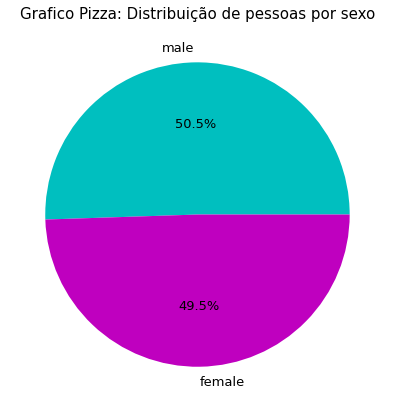

In [ ]:
# gráfico com a distribuição das pessoas por sexo
male = ds[ds.sex=="male"].count()
female = ds[ds.sex=="female"].count()
sexos = ds["sex"].unique()
labels = (sexos[1],sexos[0])
valores = (male["sex"],female["sex"])

plt.figure(figsize=(7,7))
plt.pie(autopct="%1.1f%%",x=valores, labels=labels, colors=('c','m'), textprops={'fontsize': 13})

plt.title("Grafico Pizza: Distribuição de pessoas por sexo",fontsize=15)

plt.show()

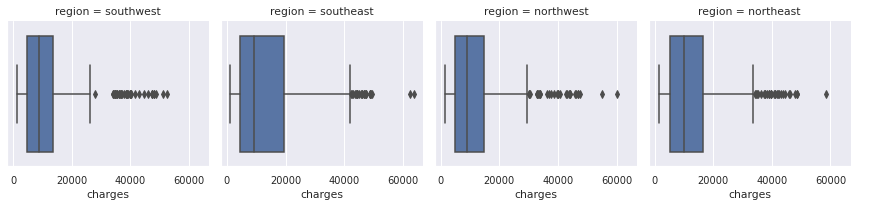

In [ ]:
sns.set(font_scale = 0.9 )
graph = sns.FacetGrid(ds, col = "region")
graph.map(sns.boxplot,"charges", order = ["charges"])
graph.add_legend();


In [ ]:
ds["bmi"]


0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

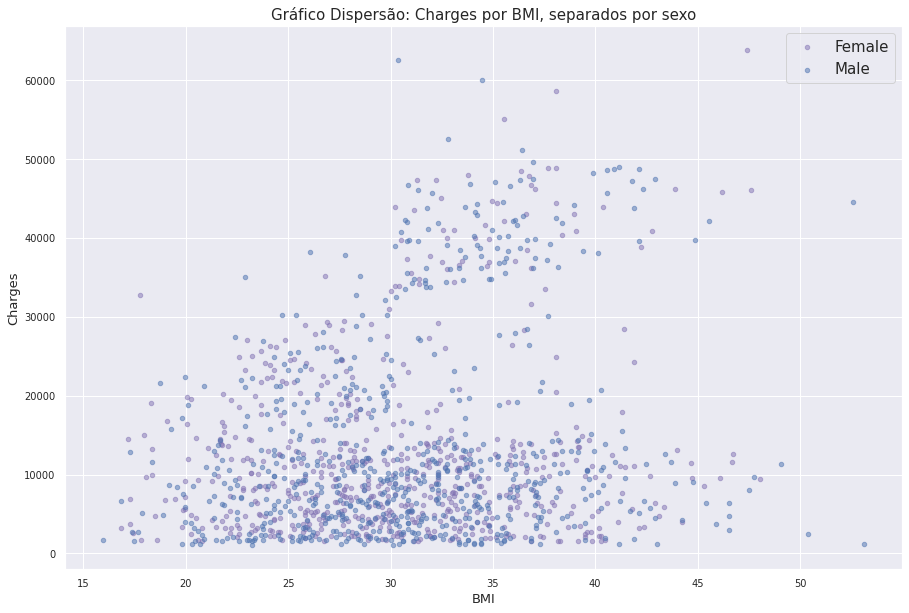

In [ ]:
# gráfico de dispersão (scatter plot) de BMI (eixo X) e Charges (eixo Y). Defina a cor dos pontos pela variável "sex"
fig, graph = plt.subplots(figsize=(15, 10))
graph.set_title("Gráfico Dispersão: Charges por BMI, separados por sexo",fontsize=15)
graph.set_ylabel("Charges", fontsize=13)
graph.set_xlabel("BMI", fontsize=13)


fx = ds[(ds["sex"] == "female")]["bmi"]
fy = ds[(ds["sex"] == "female")]["charges"]
mx = ds[(ds["sex"] == "male")]["bmi"]
my = ds[(ds["sex"] == "male")]["charges"]

graph.scatter(fx, fy, s=20, c = "m", alpha=0.5)
graph.scatter(mx, my, s=20, c= "b", alpha=0.5)
graph.legend(['Female',"Male"], loc="upper right", fontsize=15)
plt.show()

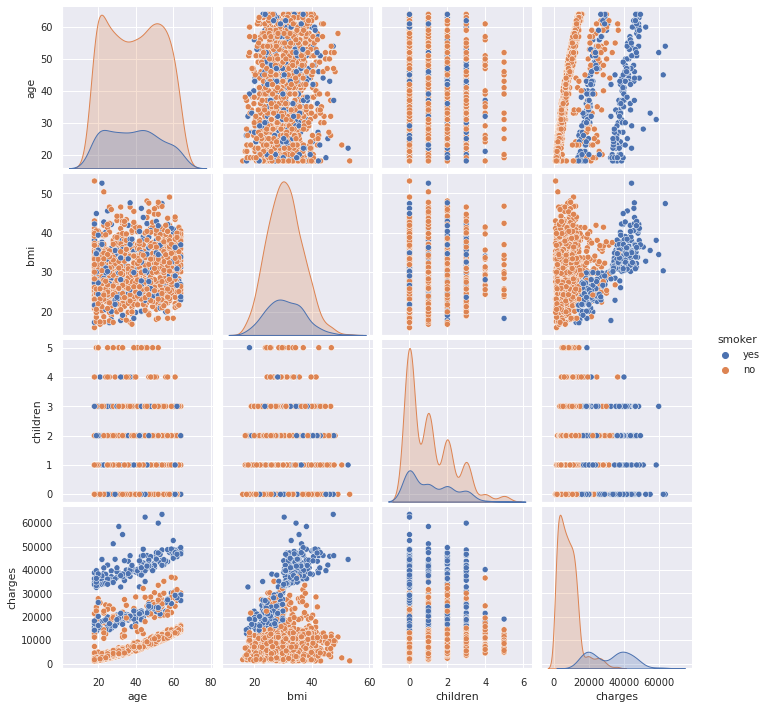

In [ ]:
# Faça um pairplot (da biblioteca seaborn) de todas as variáveis. Defina a cor (parâmetro hue ) em função da variável smoker.
# Observando especialmente os gráficos da linha ou coluna das tarifas (charges), quais são suas principais conclusões?

sns.pairplot(ds,hue="smoker")

Conclusoes

- Todas as pessoas acima de 40 anos não sao fumantes
- Pessoas com quatro filhos ou mais filhos pagam menos Charges
- A maioria das pessoas que pagam menos de vinte mil reais não são fumantes

Faça um dataframe menor selecionamento apenas selecionando as pessoas que pagam acima do valor médio da tarifa. Descreva o perfil destas pessoas em termos de suas variáveis: ou seja, possuem quantos filhos? qual a idade média? são geralmente os homens ou as mulheres? etc. Verifique quantas pessoas existem abaixo dos 30 anos E que são fumantes

In [ ]:
media = 13270.42
dsMenor = ds[ds['charges']>media]

In [ ]:
dsMenor

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
3,33,male,22.705,0,no,northwest,21984.47061
9,60,female,25.840,0,no,northwest,28923.13692
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
...,...,...,...,...,...,...,...
1318,35,male,39.710,4,no,northeast,19496.71917
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630
1328,23,female,24.225,2,no,northeast,22395.74424


In [ ]:
dsMenor.shape

(420, 7)

In [ ]:
dsMenor.describe()

,age,bmi,children,charges
count,420.000000,420.000000,420.000000,420.000000
mean,42.464286,31.039250,1.138095,27751.288177
std,15.244582,5.980884,1.202613,11583.651568
min,18.000000,17.195000,0.000000,13352.099800
25%,29.000000,26.695000,0.000000,17923.109290
50%,43.000000,30.887500,1.000000,24516.677630
75%,57.000000,35.507500,2.000000,37712.051525
max,64.000000,52.580000,5.000000,63770.428010


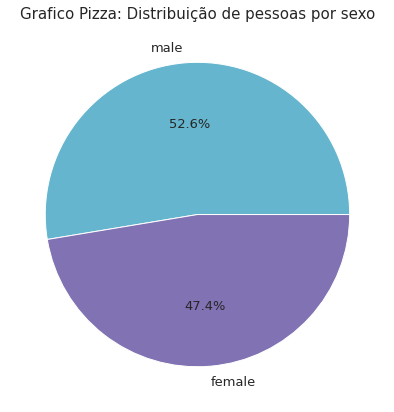

In [ ]:
male = dsMenor[dsMenor.sex=="male"].count()
female = dsMenor[dsMenor.sex=="female"].count()
sexos = dsMenor["sex"].unique()
labels = (sexos[1],sexos[0])
valores = (male["sex"],female["sex"])

plt.figure(figsize=(7,7))
plt.pie(autopct="%1.1f%%",x=valores, labels=labels, colors=('c','m'), textprops={'fontsize': 13})

plt.title("Grafico Pizza: Distribuição de pessoas por sexo",fontsize=15)

plt.show()

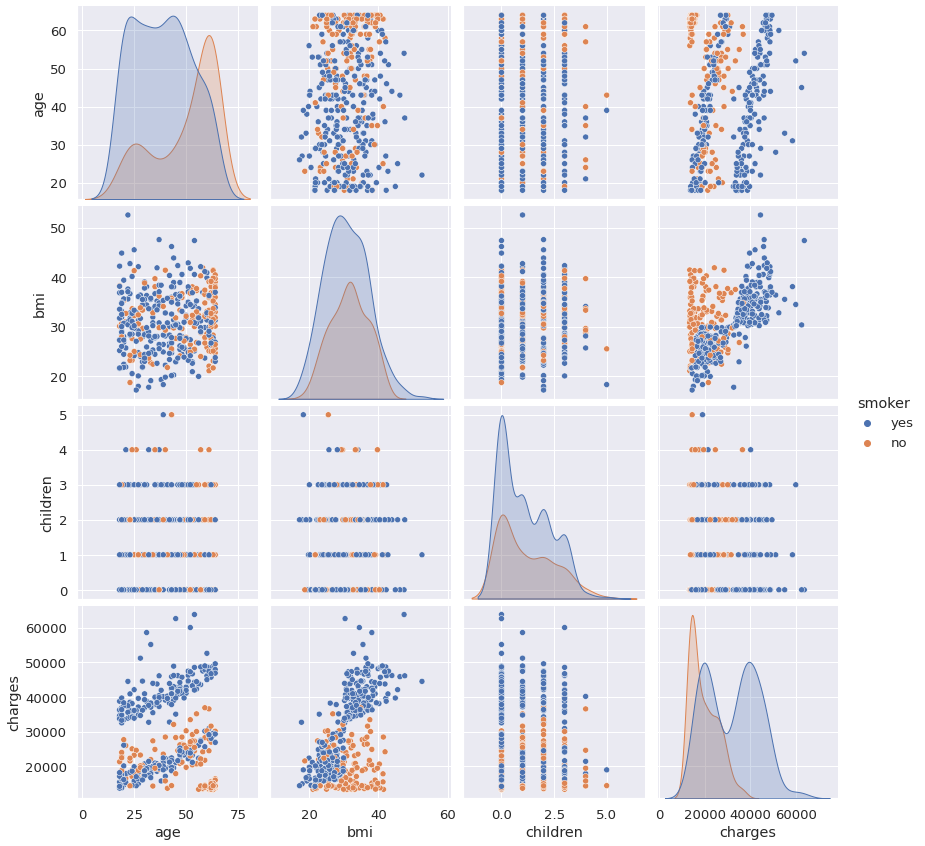

In [ ]:
sns.set(font_scale = 1.2)
sns.pairplot(dsMenor,hue='smoker',height=3)

Verifique quantas pessoas existem abaixo dos 30 anos E que são fumantes

In [ ]:
dsx = dsMenor[dsMenor['smoker']=='yes']
dsy = dsx[dsx['age']<30]
dsy.count()

age         85
sex         85
bmi         85
children    85
smoker      85
region      85
charges     85
dtype: int64

Conclusao

- A maioria das pessoas e do sexo masculino
- A idade media e de 42/46 anos
- A media de filhos e 1,12
- A media de BMI e 31,03
- A Cada 3 pessoas, 2 sao fumantes
- Existem 85 pessoas abaixo dos 30 anos e que são fumantes

In [ ]:
dsm = dsMenor
dsm

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
3,33,male,22.705,0,no,northwest,21984.47061
9,60,female,25.840,0,no,northwest,28923.13692
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
...,...,...,...,...,...,...,...
1318,35,male,39.710,4,no,northeast,19496.71917
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630
1328,23,female,24.225,2,no,northeast,22395.74424


In [ ]:
dsm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       420 non-null    int64  
 1   sex       420 non-null    object 
 2   bmi       420 non-null    float64
 3   children  420 non-null    int64  
 4   smoker    420 non-null    object 
 5   region    420 non-null    object 
 6   charges   420 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 42.4+ KB


In [ ]:
dsm['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
dicionario = {
    "male": 1,
    "female": 0
}

def new_values(x):
    return dicionario[x]
dsm["sex"] = dsm["sex"].apply(new_values);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dsm

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
3,33,1,22.705,0,no,northwest,21984.47061
9,60,0,25.840,0,no,northwest,28923.13692
11,62,0,26.290,0,yes,southeast,27808.72510
14,27,1,42.130,0,yes,southeast,39611.75770
...,...,...,...,...,...,...,...
1318,35,1,39.710,4,no,northeast,19496.71917
1321,62,1,26.695,0,yes,northeast,28101.33305
1323,42,0,40.370,2,yes,southeast,43896.37630
1328,23,0,24.225,2,no,northeast,22395.74424


In [ ]:
dsm['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
dicionario = {
    "yes": 1,
    "no": 0
}

def new_grade(x):
    return dicionario[x]
dsm["smoker"] = dsm["smoker"].apply(new_grade);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dsm

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
3,33,1,22.705,0,0,northwest,21984.47061
9,60,0,25.840,0,0,northwest,28923.13692
11,62,0,26.290,0,1,southeast,27808.72510
14,27,1,42.130,0,1,southeast,39611.75770
...,...,...,...,...,...,...,...
1318,35,1,39.710,4,0,northeast,19496.71917
1321,62,1,26.695,0,1,northeast,28101.33305
1323,42,0,40.370,2,1,southeast,43896.37630
1328,23,0,24.225,2,0,northeast,22395.74424


In [ ]:
dsm['region'].unique()

array(['southwest', 'northwest', 'southeast', 'northeast'], dtype=object)

In [ ]:
dsm_dummies = pd.get_dummies(dsm["region"])

In [ ]:
dsm_dummies

,northeast,northwest,southeast,southwest
0,0,0,0,1
3,0,1,0,0
9,0,1,0,0
11,0,0,1,0
14,0,0,1,0
...,...,...,...,...
1318,1,0,0,0
1321,1,0,0,0
1323,0,0,1,0
1328,1,0,0,0


In [ ]:
dsm.drop(columns = ["region"], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
dsm

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
3,33,1,22.705,0,0,21984.47061
9,60,0,25.840,0,0,28923.13692
11,62,0,26.290,0,1,27808.72510
14,27,1,42.130,0,1,39611.75770
...,...,...,...,...,...,...
1318,35,1,39.710,4,0,19496.71917
1321,62,1,26.695,0,1,28101.33305
1323,42,0,40.370,2,1,43896.37630
1328,23,0,24.225,2,0,22395.74424


In [ ]:
dsm = pd.concat([dsm,dsm_dummies],axis=1)

In [ ]:
dsm

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
3,33,1,22.705,0,0,21984.47061,0,1,0,0
9,60,0,25.840,0,0,28923.13692,0,1,0,0
11,62,0,26.290,0,1,27808.72510,0,0,1,0
14,27,1,42.130,0,1,39611.75770,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1318,35,1,39.710,4,0,19496.71917,1,0,0,0
1321,62,1,26.695,0,1,28101.33305,1,0,0,0
1323,42,0,40.370,2,1,43896.37630,0,0,1,0
1328,23,0,24.225,2,0,22395.74424,1,0,0,0


In [ ]:
x = dsm.drop(columns=["charges"])
y = dsm["charges"]

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.2,
                                                   random_state=22)

In [ ]:
minmax = MinMaxScaler()

x_train_scaled = minmax.fit_transform(x_train)

x_test_scaled = minmax.transform(x_test)

In [ ]:
x_train_scaled

array([[0.91304348, 1.        , 0.44976685, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.        , 0.41345203, ..., 0.        , 0.        ,
        0.        ],
       [0.2173913 , 1.        , 0.5427441 , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.7173913 , 1.        , 0.21478027, ..., 1.        , 0.        ,
        0.        ],
       [0.80434783, 1.        , 0.38123499, ..., 0.        , 0.        ,
        0.        ],
       [0.04347826, 1.        , 0.52084216, ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
x_test_scaled

array([[0.2826087 , 0.        , 0.59064575, 0.2       , 1.        ,
        1.        , 0.        , 0.        , 0.        ],
       [0.15217391, 1.        , 0.45598417, 0.4       , 1.        ,
        0.        , 0.        , 1.        , 0.        ],
       [1.        , 1.        , 0.55857002, 0.4       , 1.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.45652174, 1.        , 0.51165748, 0.4       , 1.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.41304348, 1.        , 0.35622439, 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.10869565, 0.        , 0.19867175, 0.4       , 0.        ,
        1.        , 0.        , 0.        , 0.        ],
       [0.76086957, 1.        , 0.47788611, 0.        , 1.        ,
        1.        , 0.        , 0.        , 0.        ],
       [0.97826087, 1.        , 0.40271301, 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        ],


In [ ]:
def train(x_train,x_test,y_train,y_test):
    modelo = LinearRegression()

    modelo.fit(x_train, y_train)

    y_pred = modelo.predict(x_test)

    r2 = r2_score(y_test,y_pred)
  
    print(f"\033[1;33mR2 SCORE:\033[39m \033[92m{r2}\033[39m")

In [ ]:
train(x_train_scaled,x_test_scaled,y_train,y_test)

R2 SCORE: 0.5983323342402878


# Conclusão

O modelo de Regressão Linear ficou com um R2 SCORE de 0.59, nao é um valor muito bom para se usar esse modelo de forma comercial, pois a chance dele errar ainda é relativamente alta.